#Observations
1.) The data came out as one would expect.  Urban areas have more drivers, more users, and more total profit.

2.) The average fare for rural and suburban were both higher than the average fare for urban.  This makes sense.  People in urban areas are probably going a shorter distance,  where as people in the suburban and rural were probably going a farther distance.  The total fares would be lower in this area due to less volume, but the average will be higher because of distance travelled.

3.) Working an urban area might be less profitable than a rural area.  Urban areas have more competition, and make less per customer.  Would be cool to have data throughout the day, to try and pinpoint when the optimal time to work would be.  My friend actually drove for uber, and he drove most of his customers before 8A.M. when the work day started.  He also made great money shuttling between hotels and DFW Airport.

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [2]:
#make data frames for the data
ride_data = os.path.join("raw_data/ride_data.csv")
city_data = os.path.join("raw_data/city_data.csv")
ride_df = pd.read_csv(ride_data)
city_df = pd.read_csv(city_data)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
#combine the data
combined_df = pd.merge(ride_df,city_df, on = "city", how = "right")
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [4]:
combined_df.count()

city            2407
date            2407
fare            2407
ride_id         2407
driver_count    2407
type            2407
dtype: int64

In [5]:
#group by city
grouped_df = combined_df.groupby(["city","driver_count"])
grouped_df

In [6]:
total_fares = grouped_df["fare"].sum()
total_fares.head()

city          driver_count
Alvarezhaven  21              741.79
Alyssaberg    67              535.85
Anitamouth    16              335.84
Antoniomouth  21              519.75
Aprilchester  49              417.65
Name: fare, dtype: float64

In [7]:
#find total rides per city
total_rides = grouped_df["ride_id"].nunique()
total_rides.head()

city          driver_count
Alvarezhaven  21              31
Alyssaberg    67              26
Anitamouth    16               9
Antoniomouth  21              22
Aprilchester  49              19
Name: ride_id, dtype: int64

In [8]:
#find average price per ride
total_drivers = grouped_df["driver_count"].mean()
average_fare = total_fares / total_rides
average_fare.head()

city          driver_count
Alvarezhaven  21              23.928710
Alyssaberg    67              20.609615
Anitamouth    16              37.315556
Antoniomouth  21              23.625000
Aprilchester  49              21.981579
dtype: float64

In [9]:
type_of_city = grouped_df["type"].unique()
type_of_city = type_of_city.str[0]
type_of_city.head()

city          driver_count
Alvarezhaven  21                 Urban
Alyssaberg    67                 Urban
Anitamouth    16              Suburban
Antoniomouth  21                 Urban
Aprilchester  49                 Urban
Name: type, dtype: object

In [10]:
#merge all the dataframe
new_data = {"Total Riders" : total_rides,
           "Total Fares" : total_fares, "Average Fare" : average_fare,
            "City Type" : type_of_city}
new_df = pd.DataFrame(new_data)
new_df = new_df.reset_index()
new_df.head()


,city,driver_count,Average Fare,City Type,Total Fares,Total Riders
0,Alvarezhaven,21,23.928710,Urban,741.79,31
1,Alyssaberg,67,20.609615,Urban,535.85,26
2,Anitamouth,16,37.315556,Suburban,335.84,9
3,Antoniomouth,21,23.625000,Urban,519.75,22
4,Aprilchester,49,21.981579,Urban,417.65,19


In [11]:
ctypes = ["Urban","Suburban","Rural"]
fg = sns.FacetGrid(data=new_df, hue='City Type', hue_order=ctypes, aspect=1.61)
fg.map(plt.scatter, "Total Riders", "Average Fare", "driver_count",alpha = .45, linewidth = 2).add_legend()

In [12]:
plt.title("Uber Data in Different City Types")
plt.xlabel("Riders per City")
plt.ylabel("Average Fare ($) per City")
plt.xlim(0,40)
plt.ylim(15,55)

(15, 55)

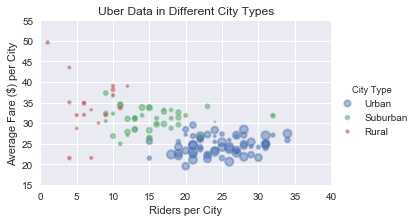

In [13]:
plt.show()

In [14]:
#% total fares by city type
pie_group = new_df.groupby("City Type")
pie_group_fares = pie_group["Total Fares"].sum()
pie_group_fares

City Type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: Total Fares, dtype: float64

In [15]:
cities = ["Urban", "Suburban","Rural"]
city_fares = [40078.34,20335.69,4255.09]
explode = [.1,0,0]
colors = ["red", "lightcoral", "lightskyblue"]
plt.title("Total Fares by City Type")
plt.pie(city_fares, explode = explode, labels = cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.2108148572569786,
 1.119508187827537,
 -1.1505575694756089,
 1.1024075033082694)

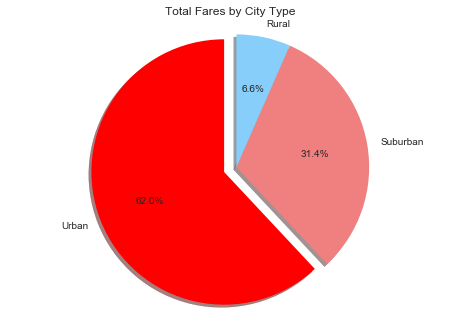

In [16]:
plt.show()

In [17]:
#% of total rides per city
pie_group["Total Riders"].sum()

City Type
Rural        125
Suburban     657
Urban       1625
Name: Total Riders, dtype: int64

In [18]:
city_riders = [1625, 657, 125]
plt.title("Total Riders by City Type")
plt.pie(city_riders, explode = explode, labels = city_riders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.1932705425802141,
 1.1098032420872641,
 -1.1614913715500408,
 1.1029281738927599)

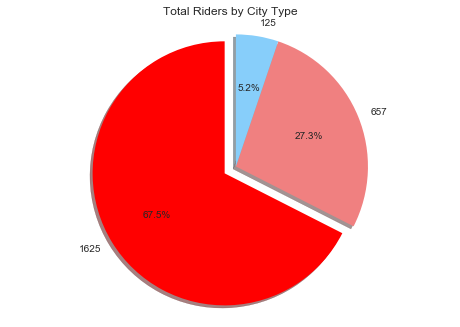

In [19]:
plt.show()

In [20]:
#% total drivers by city
pie_group["driver_count"].sum()

City Type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

In [21]:
driver_count = [2607,638,104]
plt.title("Total Drivers by City Type")
plt.pie(driver_count, explode = explode, labels = cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.1701245406694292,
 1.0866561826119843,
 -1.1858793591165591,
 1.1040894932912575)

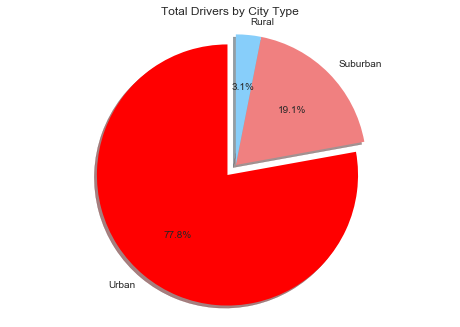

In [22]:
plt.show()